In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot') #style of plots

In [2]:
%%capture --no-display
df = pd.read_csv('ESS10.csv')

In [3]:
df.shape

(37611, 618)

Shape of the dataframe - we have 37611 rows and 618 columns.

In [4]:
df.head()

,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,hinwe,iinwe,kinwe,vinwe,inwde,jinws,jinwe,inwtm,mode,domain
0,ESS10e03,10,3.0,08.05.2023,10038,BE,0.882220,0.972276,0.718075,0.698167,...,2022-09-01 17:41:00,2022-09-01 17:41:00,2022-09-01 17:46:00,2022-09-01 17:47:00,2022-09-01 17:47:00,2022-09-01 17:47:00,2022-09-01 17:47:00,36.0,1,1.0
1,ESS10e03,10,3.0,08.05.2023,10053,BE,1.047643,0.888635,0.718075,0.638107,...,2022-04-08 10:58:00,2022-04-08 10:59:00,2022-04-08 11:04:00,2022-04-08 11:07:00,2022-04-08 11:10:00,2022-04-08 11:07:00,2022-04-08 11:10:00,54.0,2,2.0
2,ESS10e03,10,3.0,08.05.2023,10055,BE,1.087741,0.722811,0.718075,0.519033,...,2022-05-20 10:55:00,2022-05-20 10:56:00,2022-05-20 11:04:00,2022-05-20 11:08:00,2022-05-20 11:10:00,2022-05-20 11:08:00,2022-05-20 11:10:00,77.0,1,2.0
3,ESS10e03,10,3.0,08.05.2023,10062,BE,0.909910,1.005565,0.718075,0.722072,...,2022-05-22 13:51:00,2022-05-22 13:53:00,2022-05-22 13:57:00,2022-05-22 13:58:00,2022-05-22 13:59:00,2022-05-22 13:58:00,2022-05-22 13:59:00,55.0,1,1.0
4,ESS10e03,10,3.0,08.05.2023,10064,BE,0.918949,0.638705,0.718075,0.458639,...,2022-05-18 11:33:00,2022-05-18 11:34:00,2022-05-18 11:39:00,2022-05-18 11:44:00,2022-05-18 11:45:00,2022-05-18 11:44:00,2022-05-18 11:45:00,55.0,1,1.0


In [6]:
df = df.loc[df['cntry'] == 'GB']

Filtering data to include only GB

In [7]:
df = df[['stflife','agea','rlgblg','health','sclmeet','volunfp','polintr','nwspol','edulvlb','mnactic','hinctnta']].copy()

In [8]:
df.head()

,stflife,agea,rlgblg,health,sclmeet,volunfp,polintr,nwspol,edulvlb,mnactic,hinctnta
13154,8,72,2,3,3,2,4,60,800,6,4
13155,8,83,2,1,4,2,2,90,520,6,6
13156,7,69,1,3,2,2,2,60,113,6,2
13157,8,21,2,2,6,1,2,60,313,2,8
13158,5,64,2,3,3,2,4,30,212,1,4


In [9]:
df.dtypes

stflife     int64
agea        int64
rlgblg      int64
health      int64
sclmeet     int64
volunfp     int64
polintr     int64
nwspol      int64
edulvlb     int64
mnactic     int64
hinctnta    int64
dtype: object

In [10]:
df.shape

(1149, 11)

1149 rows and 12 cols.

In [11]:
df = df.rename(columns={'stflife':'stf','agea':'age','rlgblg':'religion','sclmeet':'social','volunfp':'volun','polintr':'politics','nwspol':'news','edulvlb':'edu','mnactic':'mainact','hinctnta':'income'}).copy()

In [12]:
df.head()

,stf,age,religion,health,social,volun,politics,news,edu,mainact,income
13154,8,72,2,3,3,2,4,60,800,6,4
13155,8,83,2,1,4,2,2,90,520,6,6
13156,7,69,1,3,2,2,2,60,113,6,2
13157,8,21,2,2,6,1,2,60,313,2,8
13158,5,64,2,3,3,2,4,30,212,1,4


In [13]:
df.isna().sum()

stf         0
age         0
religion    0
health      0
social      0
volun       0
politics    0
news        0
edu         0
mainact     0
income      0
dtype: int64

We do not have missing data interpreted as null, but they are coded in the survey as specific values. These will be analyzed in the next step.

### Univariate analysis

##### stf variable

In [14]:
df['stf'].value_counts()

8     279
7     225
9     174
10    126
6     110
5      93
4      46
3      44
2      22
0      19
1      10
88      1
Name: stf, dtype: int64

There is one answer "88" understood as "I don't know". It will not give any added value so it will be removed.

In [15]:
to_drop = df[df['stf'] == 88].index
df = df.drop(to_drop)

Text(0, 0.5, 'Count')

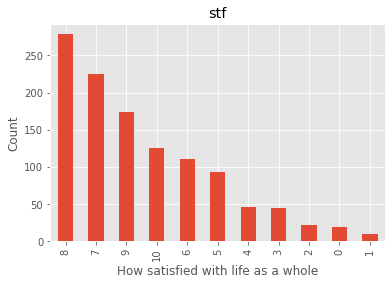

In [16]:
ax_stf = df['stf'].value_counts().plot(kind='bar', title='stf')
ax_stf.set_xlabel('How satisfied with life as a whole')
ax_stf.set_ylabel('Count')

##### age variable

In [17]:
df['age'].value_counts()

70    31
74    29
72    26
52    26
75    25
      ..
19     4
20     4
88     3
17     3
15     2
Name: age, Length: 77, dtype: int64

In [18]:
to_drop = df[df['age'] == 999].index
df = df.drop(to_drop)

age 999 - not available

In [19]:
df['age'].value_counts()

70    31
74    29
72    26
52    26
75    25
      ..
20     4
19     4
88     3
17     3
15     2
Name: age, Length: 76, dtype: int64

Text(0, 0.5, 'Count')

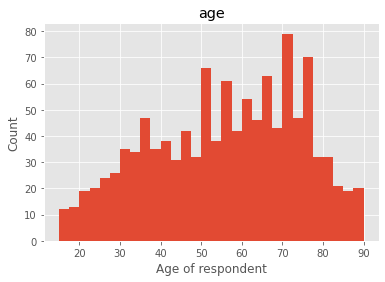

In [20]:
ax_age = df['age'].plot(kind='hist', bins=30, title='age')
ax_age.set_xlabel('Age of respondent')
ax_age.set_ylabel('Count')

In [21]:
df['age'].describe()

count    1141.000000
mean       55.724803
std        18.292161
min        15.000000
25%        41.000000
50%        57.000000
75%        71.000000
max        90.000000
Name: age, dtype: float64

##### religion variable

In [22]:
df['religion'].value_counts()

2    652
1    487
8      1
7      1
Name: religion, dtype: int64

In [23]:
to_drop = df[df['religion'] == 8].index
df = df.drop(to_drop)
to_drop = df[df['religion'] == 9].index
df = df.drop(to_drop)
to_drop = df[df['religion'] == 7].index
df = df.drop(to_drop)

In [24]:
df['religion'].value_counts()

2    652
1    487
Name: religion, dtype: int64

Text(0, 0.5, 'Count')

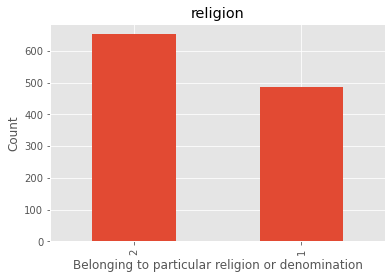

In [25]:
ax_religion = df['religion'].value_counts().plot(kind='bar', title='religion')
ax_religion.set_xlabel('Belonging to particular religion or denomination')
ax_religion.set_ylabel('Count')

##### health variable

In [26]:
df['health'].value_counts()

2    464
3    295
1    269
4     78
5     33
Name: health, dtype: int64

There are no missing values represented as 7, 8 or 9.

Text(0, 0.5, 'Count')

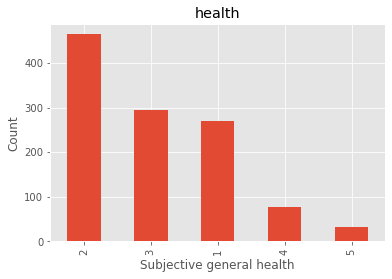

In [27]:
ax_health = df['health'].value_counts().plot(kind='bar', title='health')
ax_health.set_xlabel('Subjective general health')
ax_health.set_ylabel('Count')

##### social variable

In [28]:
df['social'].value_counts()

6    309
5    255
4    206
2    122
3    114
7    108
1     25
Name: social, dtype: int64

There are no missing values represented as 77, 88 or 99

Text(0, 0.5, 'Count')

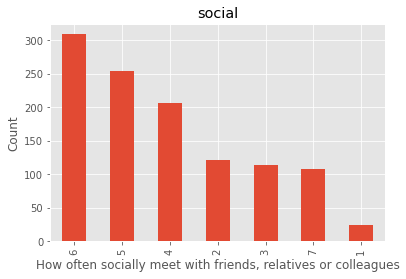

In [29]:
ax_social = df['social'].value_counts().plot(kind='bar', title='social')
ax_social.set_xlabel('How often socially meet with friends, relatives or colleagues')
ax_social.set_ylabel('Count')

##### volun variable

In [30]:
df['volun'].value_counts()

2    826
1    313
Name: volun, dtype: int64

There are no missing values represented as 7, 8 or 9

Text(0, 0.5, 'Count')

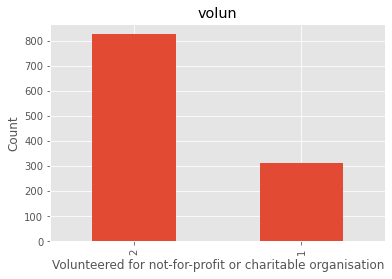

In [31]:
ax_volun = df['volun'].value_counts().plot(kind='bar', title='volun')
ax_volun.set_xlabel('Volunteered for not-for-profit or charitable organisation')
ax_volun.set_ylabel('Count')

##### politics variable

In [32]:
df['politics'].value_counts()

2    500
3    250
1    230
4    159
Name: politics, dtype: int64

There are no missing values represented as 7, 8 or 9.

Text(0, 0.5, 'Count')

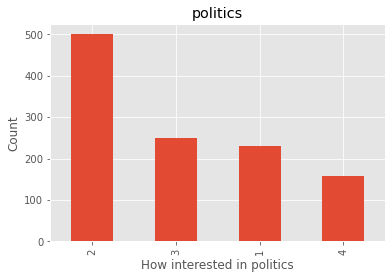

In [33]:
ax_politics = df['politics'].value_counts().plot(kind='bar', title='politics')
ax_politics.set_xlabel('How interested in politics')
ax_politics.set_ylabel('Count')

##### news variable

In [34]:
df['news'].value_counts()

60      312
0       134
30      133
120     129
90       66
180      56
15       39
10       38
240      29
5        29
20       27
45       22
300      19
150      19
600      13
360      12
40        5
65        5
900       4
210       4
2         4
125       4
9999      3
1200      3
480       3
50        3
270       3
75        2
70        2
245       2
1         2
605       1
420       1
660       1
230       1
540       1
140       1
330       1
33        1
1047      1
105       1
135       1
780       1
610       1
Name: news, dtype: int64

In [35]:
to_drop = df[df['news'] == 9999].index
df = df.drop(to_drop)

In [36]:
df['news'].value_counts()

60      312
0       134
30      133
120     129
90       66
180      56
15       39
10       38
5        29
240      29
20       27
45       22
150      19
300      19
600      13
360      12
40        5
65        5
210       4
900       4
2         4
125       4
480       3
50        3
1200      3
270       3
245       2
1         2
75        2
70        2
330       1
135       1
140       1
1047      1
780       1
33        1
105       1
540       1
230       1
660       1
420       1
605       1
610       1
Name: news, dtype: int64

Text(0, 0.5, 'Count')

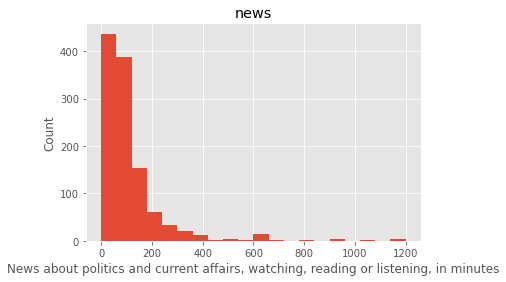

In [37]:
ax_news = df['news'].plot(kind='hist', bins=20, title='news')
ax_news.set_xlabel('News about politics and current affairs, watching, reading or listening, in minutes')
ax_news.set_ylabel('Count')

##### edu variable

In [38]:
df['edu'].value_counts()

620     197
113     195
720     155
323     122
520     109
321      72
213      52
313      46
800      42
212      42
423      38
8888     16
510      13
222      13
229       8
5555      7
7777      3
413       3
0         3
Name: edu, dtype: int64

In [39]:
to_drop = df[df['edu'] == 5555].index
df = df.drop(to_drop)
to_drop = df[df['edu'] == 7777].index
df = df.drop(to_drop)
to_drop = df[df['edu'] == 8888].index
df = df.drop(to_drop)

In [40]:
df['edu'].value_counts()

620    197
113    195
720    155
323    122
520    109
321     72
213     52
313     46
800     42
212     42
423     38
222     13
510     13
229      8
413      3
0        3
Name: edu, dtype: int64

Text(0, 0.5, 'Count')

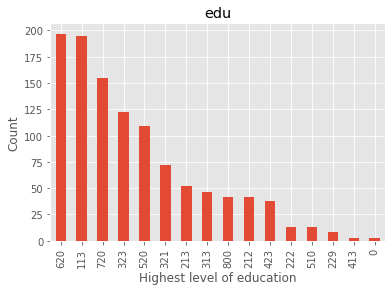

In [41]:
ax_edu = df['edu'].value_counts().plot(kind='bar', title='edu')
ax_edu.set_xlabel('Highest level of education')
ax_edu.set_ylabel('Count')

##### mainact variable

In [42]:
df['mainact'].value_counts()

1     534
6     379
8      75
5      43
2      34
3      26
4      12
9       6
88      1
Name: mainact, dtype: int64

In [43]:
to_drop = df[df['mainact'] == 88].index
df = df.drop(to_drop)

In [44]:
df['mainact'].value_counts()

1    534
6    379
8     75
5     43
2     34
3     26
4     12
9      6
Name: mainact, dtype: int64

Text(0, 0.5, 'Count')

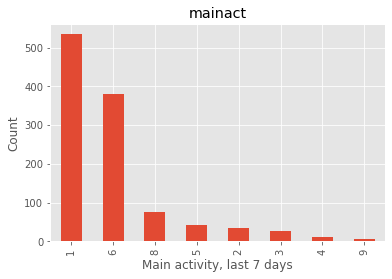

In [45]:
ax_mainact = df['mainact'].value_counts().plot(kind='bar', title='mainact')
ax_mainact.set_xlabel('Main activity, last 7 days')
ax_mainact.set_ylabel('Count')

##### income variable

In [46]:
df['income'].value_counts()

2     111
10    111
5     109
1     107
4     106
9      98
3      87
6      86
8      86
7      83
88     65
77     60
Name: income, dtype: int64

In [47]:
to_drop = df[df['income'] == 88].index
df = df.drop(to_drop)
to_drop = df[df['income'] == 77].index
df = df.drop(to_drop)

In [48]:
df['income'].value_counts()

2     111
10    111
5     109
1     107
4     106
9      98
3      87
6      86
8      86
7      83
Name: income, dtype: int64

Text(0, 0.5, 'Count')

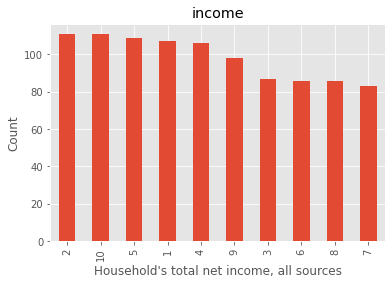

In [49]:
ax_mainact = df['income'].value_counts().plot(kind='bar', title='income')
ax_mainact.set_xlabel('Household\'s total net income, all sources')
ax_mainact.set_ylabel('Count')

### Feature relationships

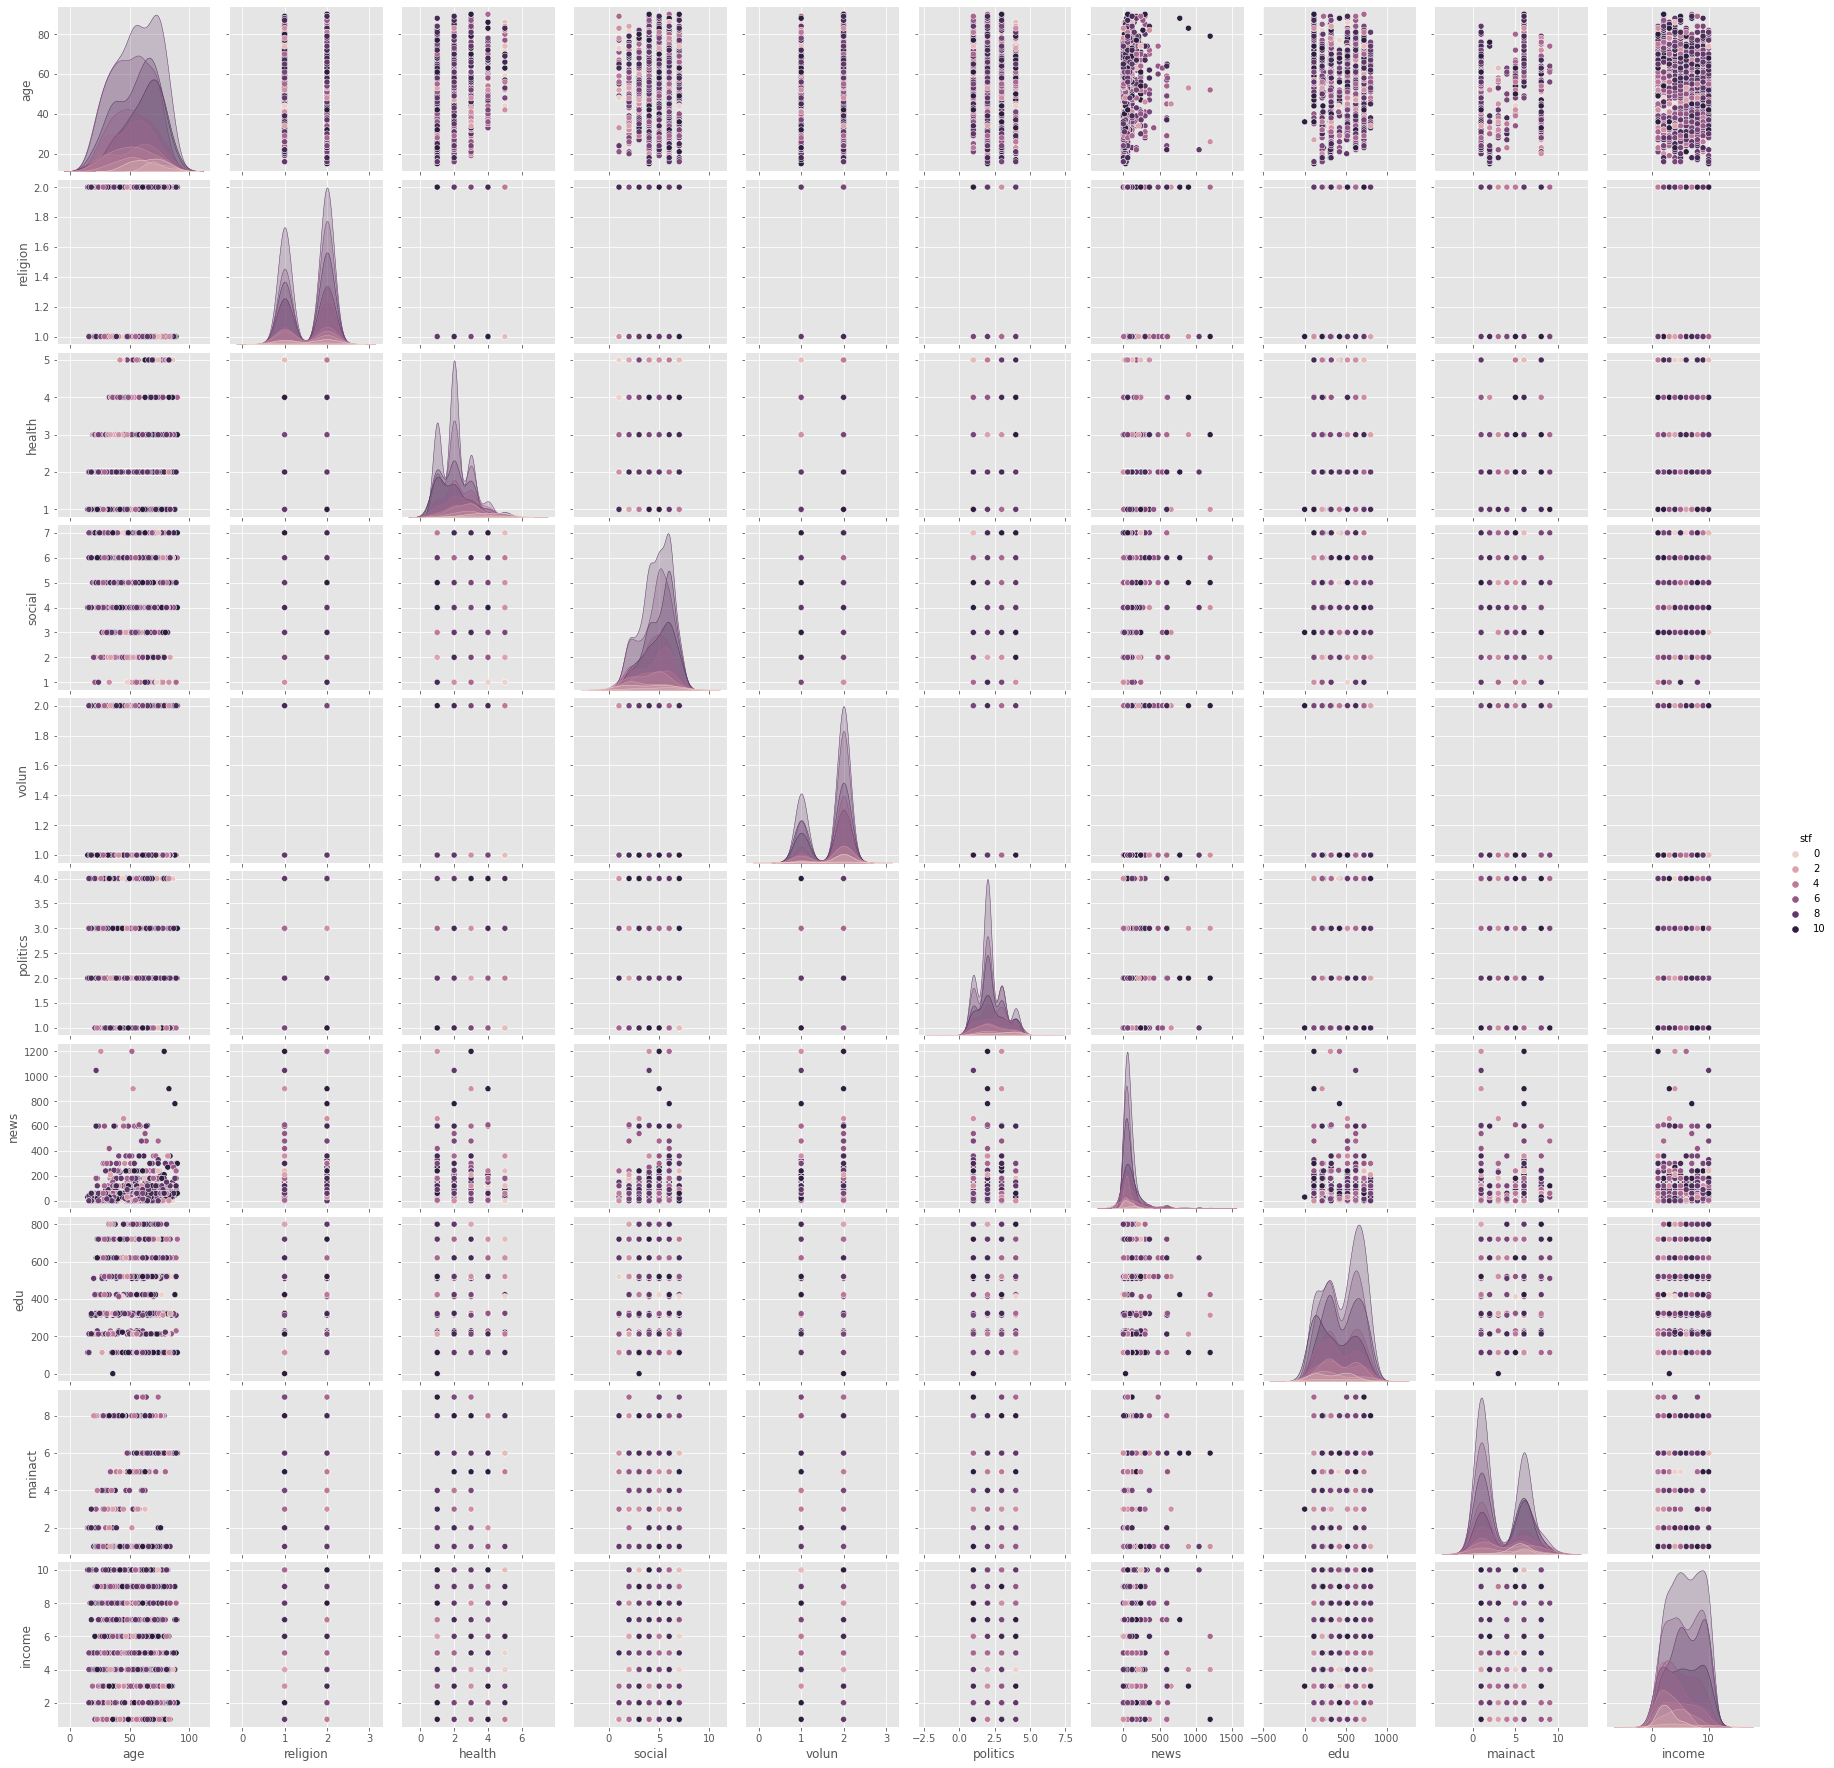

In [50]:
sns.pairplot(df, vars=['age','religion','health','social','volun','politics','news','edu','mainact','income'],
            hue='stf')

In [51]:
corr = df[['age','religion','health','social','volun','politics','news','edu','mainact','income']].corr()
corr

,age,religion,health,social,volun,politics,news,edu,mainact,income
age,1.000000,-0.164494,0.192107,0.032565,-0.058436,-0.103600,0.100535,-0.200184,0.531982,-0.178621
religion,-0.164494,1.000000,-0.077786,-0.022341,0.082610,0.112657,-0.058890,-0.082631,-0.095444,-0.020895
health,0.192107,-0.077786,1.000000,-0.100318,0.099255,0.158451,0.033583,-0.210861,0.253874,-0.291784
social,0.032565,-0.022341,-0.100318,1.000000,-0.132089,-0.051176,0.042118,0.074643,0.030785,0.073168
volun,-0.058436,0.082610,0.099255,-0.132089,1.000000,0.131558,-0.033573,-0.210364,0.019538,-0.153470
politics,-0.103600,0.112657,0.158451,-0.051176,0.131558,1.000000,-0.134601,-0.289009,0.040414,-0.224128
news,0.100535,-0.058890,0.033583,0.042118,-0.033573,-0.134601,1.000000,-0.011002,0.052039,-0.032909
edu,-0.200184,-0.082631,-0.210861,0.074643,-0.210364,-0.289009,-0.011002,1.000000,-0.192985,0.348571
mainact,0.531982,-0.095444,0.253874,0.030785,0.019538,0.040414,0.052039,-0.192985,1.000000,-0.325840
income,-0.178621,-0.020895,-0.291784,0.073168,-0.153470,-0.224128,-0.032909,0.348571,-0.325840,1.000000


<AxesSubplot:>

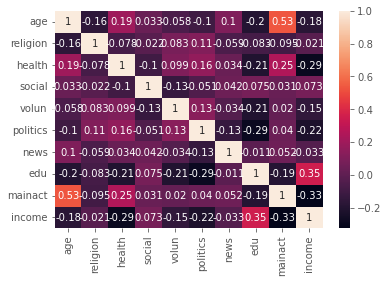

In [52]:
sns.heatmap(corr, annot=True)

The moderate correlation found between age and main activity seems reasonable - younger people are more likely to be students and older people are more likely to be retirees.

<AxesSubplot:xlabel='mainact', ylabel='age'>

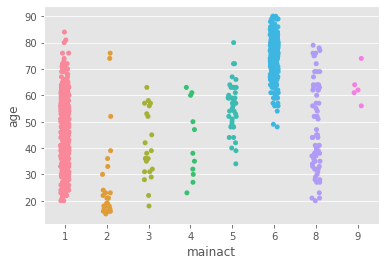

In [53]:
sns.stripplot(x='mainact', y='age',data=df)

In addition, an analysis of collinearity was performed.

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = pd.DataFrame()
VIF['variable'] = df.columns
VIF['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
VIF

,variable,VIF
0,stf,12.599579
1,age,13.708096
2,religion,10.240833
3,health,6.950367
4,social,9.711624
5,volun,13.090956
6,politics,7.144148
7,news,1.523837
8,edu,5.251818
9,mainact,4.113540


The analysis showed high collinearity for several variables. At a further stage, this may increase variance of coefficient estimates which may lead to difficulties in obtaining statistically significant results.

### Data categorization

In [55]:
df1 = df.copy()

In [56]:
df.head()

,stf,age,religion,health,social,volun,politics,news,edu,mainact,income
13154,8,72,2,3,3,2,4,60,800,6,4
13155,8,83,2,1,4,2,2,90,520,6,6
13156,7,69,1,3,2,2,2,60,113,6,2
13157,8,21,2,2,6,1,2,60,313,2,8
13158,5,64,2,3,3,2,4,30,212,1,4


##### stf variable

In [57]:
cat_stf = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1}

In [58]:
df['stf'] = df['stf'].map(cat_stf)

<AxesSubplot:title={'center':'stf'}>

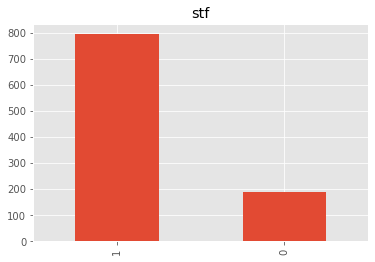

In [59]:
df['stf'].value_counts().plot(kind='bar', title='stf')

1 - satisfied with life as a whole  
0 - dissatisfied with life as a whole

##### health variable

In [60]:
cat_health = {1:1,2:2,3:3,4:4,5:4}

In [61]:
df['health'] = df['health'].map(cat_health)

<AxesSubplot:title={'center':'health'}>

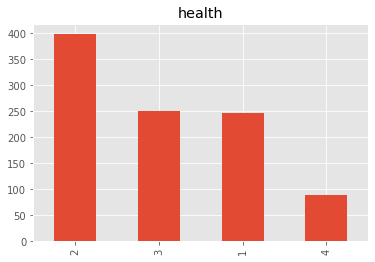

In [62]:
df['health'].value_counts().plot(kind='bar', title='health')

1 - very good subjective general health  
2 - good subjective general health  
3 - fair subjective general health  
4 - bad or very bad health status

<AxesSubplot:xlabel='health', ylabel='count'>

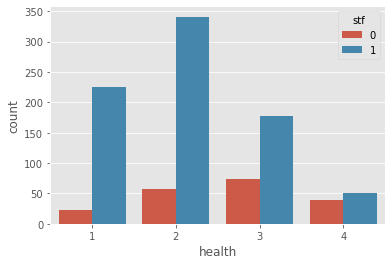

In [63]:
sns.countplot(data=df, x="health", hue="stf")

##### social variable

In [64]:
cat_social = {1:1,2:1,3:1,4:2,5:2,6:3,7:3}

In [65]:
df['social'] = df['social'].map(cat_social)

<AxesSubplot:title={'center':'social'}>

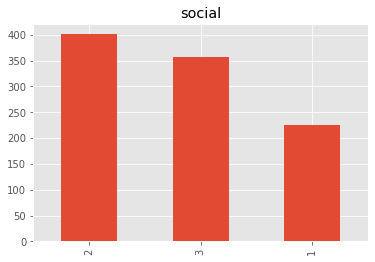

In [66]:
df['social'].value_counts().plot(kind='bar', title='social')

How often socially meet with friends, relatives or colleagues?  
1 - once a month or less  
2 - several times a month  
3 - several times a week or more

<AxesSubplot:xlabel='social', ylabel='count'>

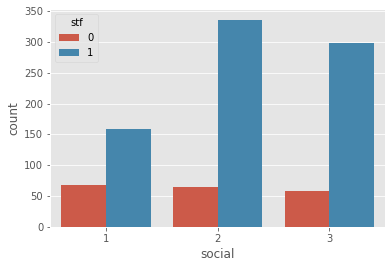

In [67]:
sns.countplot(data=df, x="social", hue="stf")

##### edu variable

In [68]:
cat_edu = {0:1,113:1,129:1,212:1,213:1,221:1,222:1,223:1,229:1,311:2,312:2,313:2,321:2,322:2,323:2,412:2,413:2,421:2,422:2,423:2,510:3,520:3,610:3,620:3,710:3,720:3,800:3}

In [69]:
df['edu'] = df['edu'].map(cat_edu)

<AxesSubplot:title={'center':'edu'}>

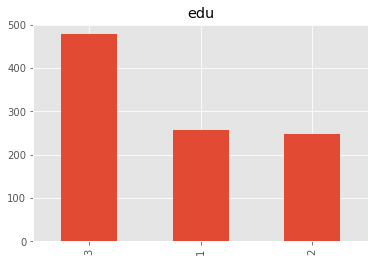

In [70]:
df['edu'].value_counts().plot(kind='bar', title='edu')

1 - primary education or lower  
2 - medium education  
3 - high education

<AxesSubplot:xlabel='edu', ylabel='count'>

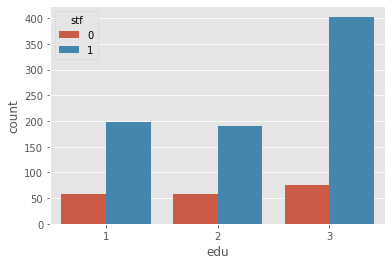

In [71]:
sns.countplot(data=df, x="edu", hue="stf")

##### mainact variable

In [72]:
to_drop = df[df['mainact'] == 9].index
df = df.drop(to_drop)

Value 9 was removed as a category with low count and no added value.

In [73]:
cat_mainact = {1:1,2:2,3:3,4:3,5:3,6:4,7:1,8:5}

In [74]:
df['mainact'] = df['mainact'].map(cat_mainact)

<AxesSubplot:title={'center':'mainact'}>

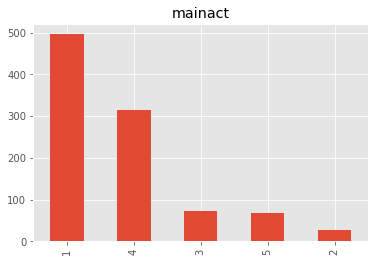

In [75]:
df['mainact'].value_counts().plot(kind='bar', title='mainact')

Main activity last 7 days  
1 - Paid work, community or military service  
2 - Education  
3 - Unemployed/disabled  
4 - Retired  
5 - Housework, looking after others

<AxesSubplot:xlabel='mainact', ylabel='count'>

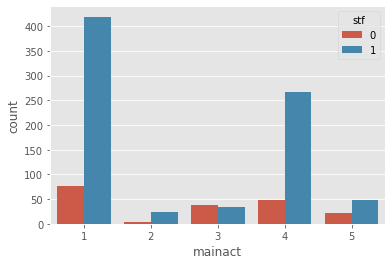

In [76]:
sns.countplot(data=df, x="mainact", hue="stf")

##### income variable

In [77]:
cat_income = {1:1,2:1,3:2,4:2,5:3,6:3,7:4,8:4,9:5,10:6}

In [78]:
df['income'] = df['income'].map(cat_income)

<AxesSubplot:title={'center':'income'}>

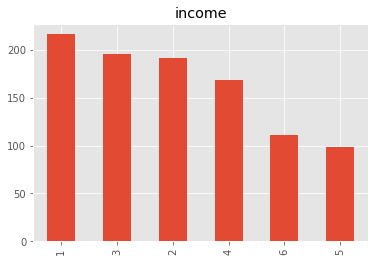

In [79]:
df['income'].value_counts().plot(kind='bar', title='income')

Household's total net income, all sources (higher decile - higher income)  
1 - 1st and 2nd decile  
2 - 3th and 4th decile  
3 - 5th and 6th decile  
4 - 7th and 8th decile  
5 - 9th decile  
6 - 10th decile  

<AxesSubplot:xlabel='income', ylabel='count'>

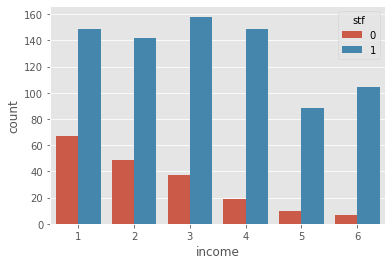

In [80]:
sns.countplot(data=df, x="income", hue="stf")

In [81]:
df

,stf,age,religion,health,social,volun,politics,news,edu,mainact,income
13154,1,72,2,3,1,2,4,60,3,4,2
13155,1,83,2,1,2,2,2,90,3,4,3
13156,1,69,1,3,1,2,2,60,1,4,1
13157,1,21,2,2,3,1,2,60,2,2,4
13158,0,64,2,3,1,2,4,30,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
14298,1,39,1,2,2,2,2,120,3,2,4
14299,1,61,2,3,1,2,1,60,1,1,1
14300,1,61,2,1,2,1,1,240,3,1,4
14301,1,56,2,2,2,1,2,60,1,1,5


### Model

In [82]:
import statsmodels.api as sm

In [83]:
Xtrain = df[['age','religion','health','social','volun','politics','news','edu','mainact','income']]
Ytrain = df[['stf']]

In [84]:
log_reg = sm.Logit(Ytrain, Xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.435576
         Iterations 6


In [85]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    stf   No. Observations:                  979
Model:                          Logit   Df Residuals:                      969
Method:                           MLE   Df Model:                            9
Date:                Mon, 26 Jun 2023   Pseudo R-squ.:                  0.1122
Time:                        21:58:43   Log-Likelihood:                -426.43
converged:                       True   LL-Null:                       -480.32
Covariance Type:            nonrobust   LLR p-value:                 4.161e-19
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0163      0.005      3.135      0.002       0.006       0.026
religion      -0.1169      0.165     -0.709      0.478      -0.440       0.206
health        -0.5727      0.098     -5.870      0.000      -0.764      -0.381
social         0.3673      0.108      3.401      0.001       0.156       0.579
volun          0.3155      0.175      1.798      0.072      -0.028       0.659
politics      -0.0489      0.089     -0.548      0.583      -0.223       0.126
news          -0.0010      0.001     -1.770      0.077      -0.002       0.000
edu            0.0547      0.099      0.554      0.580      -0.139       0.248
mainact       -0.0196      0.068     -0.290      0.772      -0.152       0.113
income         0.3264      0.063      5.183      0.000       0.203       0.450
==============================================================================
"""

In [86]:
log_reg.aic

872.8568596107447

In [87]:
log_reg.bic

921.7221760360497

##### Process of removing statistically insignificant variables one by one

In [88]:
Xtrain = df[['age','religion','health','social','volun','politics','news','edu','income']]

In [89]:
log_reg = sm.Logit(Ytrain, Xtrain).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.435618
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    stf   No. Observations:                  979
Model:                          Logit   Df Residuals:                      970
Method:                           MLE   Df Model:                            8
Date:                Mon, 26 Jun 2023   Pseudo R-squ.:                  0.1121
Time:                        21:58:43   Log-Likelihood:                -426.47
converged:                       True   LL-Null:                       -480.32
Covariance Type:            nonrobust   LLR p-value:                 1.132e-19
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0155      0.005      3.424      0.001       0.007       0.024
religion      -0.1165      0.165     -0.707      0.479      -0.440       0.206
health        -0.5761      0.097     -5.945      0.000      -0.766      -0.386
social         0.3650      0.108      3.389      0.001       0.154       0.576
volun          0.3131      0.175      1.786      0.074      -0.030       0.657
politics      -0.0499      0.089     -0.561      0.575      -0.224       0.124
news          -0.0010      0.001     -1.762      0.078      -0.002       0.000
edu            0.0538      0.099      0.544      0.586      -0.140       0.247
income         0.3307      0.061      5.393      0.000       0.211       0.451
==============================================================================
"""

In [90]:
log_reg.aic

870.9409412133971

In [91]:
log_reg.bic

914.9197259961717

In [92]:
Xtrain = df[['age','religion','health','social','volun','news','edu','income']]

In [93]:
log_reg = sm.Logit(Ytrain, Xtrain).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.435779
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    stf   No. Observations:                  979
Model:                          Logit   Df Residuals:                      971
Method:                           MLE   Df Model:                            7
Date:                Mon, 26 Jun 2023   Pseudo R-squ.:                  0.1118
Time:                        21:58:43   Log-Likelihood:                -426.63
converged:                       True   LL-Null:                       -480.32
Covariance Type:            nonrobust   LLR p-value:                 3.206e-20
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0155      0.005      3.410      0.001       0.007       0.024
religion      -0.1390      0.160     -0.870      0.385      -0.452       0.174
health        -0.5872      0.095     -6.187      0.000      -0.773      -0.401
social         0.3583      0.107      3.346      0.001       0.148       0.568
volun          0.2869      0.169      1.697      0.090      -0.044       0.618
news          -0.0010      0.001     -1.720      0.085      -0.002       0.000
edu            0.0555      0.099      0.562      0.574      -0.138       0.249
income         0.3316      0.061      5.411      0.000       0.211       0.452
==============================================================================
"""

In [94]:
log_reg.aic

869.2555488030196

In [95]:
log_reg.bic

908.3478019432637

In [96]:
Xtrain = df[['age','religion','health','social','volun','news','income']]

In [97]:
log_reg = sm.Logit(Ytrain, Xtrain).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.435940
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    stf   No. Observations:                  979
Model:                          Logit   Df Residuals:                      972
Method:                           MLE   Df Model:                            6
Date:                Mon, 26 Jun 2023   Pseudo R-squ.:                  0.1115
Time:                        21:58:43   Log-Likelihood:                -426.79
converged:                       True   LL-Null:                       -480.32
Covariance Type:            nonrobust   LLR p-value:                 8.382e-21
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0155      0.005      3.429      0.001       0.007       0.024
religion      -0.1271      0.158     -0.803      0.422      -0.437       0.183
health        -0.5822      0.094     -6.167      0.000      -0.767      -0.397
social         0.3704      0.105      3.531      0.000       0.165       0.576
volun          0.2978      0.168      1.777      0.076      -0.031       0.626
news          -0.0010      0.001     -1.701      0.089      -0.002       0.000
income         0.3457      0.056      6.168      0.000       0.236       0.456
==============================================================================
"""

In [98]:
log_reg.aic

867.5705913301534

In [99]:
log_reg.bic

901.7763128278671

In [100]:
Xtrain = df[['age','health','social','volun','news','income']]

In [101]:
log_reg = sm.Logit(Ytrain, Xtrain).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.436270
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    stf   No. Observations:                  979
Model:                          Logit   Df Residuals:                      973
Method:                           MLE   Df Model:                            5
Date:                Mon, 26 Jun 2023   Pseudo R-squ.:                  0.1108
Time:                        21:58:43   Log-Likelihood:                -427.11
converged:                       True   LL-Null:                       -480.32
Covariance Type:            nonrobust   LLR p-value:                 2.338e-21
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0153      0.005      3.385      0.001       0.006       0.024
health        -0.5906      0.094     -6.298      0.000      -0.774      -0.407
social         0.3504      0.102      3.437      0.001       0.151       0.550
volun          0.2366      0.149      1.583      0.113      -0.056       0.530
news          -0.0010      0.001     -1.666      0.096      -0.002       0.000
income         0.3370      0.055      6.147      0.000       0.230       0.444
==============================================================================
"""

In [102]:
log_reg.aic

866.2173841362442

In [103]:
log_reg.bic

895.5365739914272

In [104]:
Xtrain = df[['age','health','social','news','income']]

In [105]:
log_reg = sm.Logit(Ytrain, Xtrain).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.437541
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    stf   No. Observations:                  979
Model:                          Logit   Df Residuals:                      974
Method:                           MLE   Df Model:                            4
Date:                Mon, 26 Jun 2023   Pseudo R-squ.:                  0.1082
Time:                        21:58:43   Log-Likelihood:                -428.35
converged:                       True   LL-Null:                       -480.32
Covariance Type:            nonrobust   LLR p-value:                 1.432e-21
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0173      0.004      3.962      0.000       0.009       0.026
health        -0.5286      0.085     -6.232      0.000      -0.695      -0.362
social         0.3906      0.098      3.972      0.000       0.198       0.583
news          -0.0009      0.001     -1.628      0.103      -0.002       0.000
income         0.3595      0.053      6.740      0.000       0.255       0.464
==============================================================================
"""

In [106]:
log_reg.aic

866.7061372502467

In [107]:
log_reg.bic

891.1387954628992

In [108]:
Xtrain = df[['age','health','social','income']]

In [109]:
log_reg = sm.Logit(Ytrain, Xtrain).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.438834
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    stf   No. Observations:                  979
Model:                          Logit   Df Residuals:                      975
Method:                           MLE   Df Model:                            3
Date:                Mon, 26 Jun 2023   Pseudo R-squ.:                  0.1056
Time:                        21:58:43   Log-Likelihood:                -429.62
converged:                       True   LL-Null:                       -480.32
Covariance Type:            nonrobust   LLR p-value:                 7.774e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0164      0.004      3.797      0.000       0.008       0.025
health        -0.5329      0.085     -6.301      0.000      -0.699      -0.367
social         0.3786      0.098      3.878      0.000       0.187       0.570
income         0.3577      0.053      6.718      0.000       0.253       0.462
==============================================================================
"""

In [110]:
log_reg.aic

867.2373407261429

In [111]:
log_reg.bic

886.7834672962649

This model shows the lowest BIC statistic, but also has a slightly lower Pseudo R-square value. However, it will be used for further modeling.

In [112]:
odds_ratio = pd.DataFrame(
    {
        "Odds ratio": log_reg.params,
        "Conf. int. lower": log_reg.conf_int()[0],
        "Conf. int. upper": log_reg.conf_int()[1],
    }
)
odds_ratio = np.exp(odds_ratio)
odds_ratio

,Odds ratio,Conf. int. lower,Conf. int. upper
age,1.016531,1.007964,1.025171
health,0.586896,0.497248,0.692706
social,1.460232,1.205909,1.768190
income,1.429970,1.288278,1.587247


### Logistic Regression using sklearn

In [113]:
x = df[['age','health','social','income']]
y = df[['stf']]

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [115]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=40)

In [116]:
y_train = y_train.squeeze()
y_test = y_test.squeeze()

In [117]:
log_reg2 = LogisticRegression()
log_reg2.fit(x_train,y_train)
predict_test = log_reg2.predict(x_test)
predict_train = log_reg2.predict(x_train)

In [118]:
accuracy_score(y_test,predict_test)

0.8231292517006803

In [119]:
accuracy_score(y_train,predict_train)

0.8087591240875912

In [120]:
confusion_matrix(y_test,predict_test)

array([[  4,  49],
       [  3, 238]], dtype=int64)

In [121]:
prob_test = log_reg2.predict_proba(x_test)[:,1]

In [122]:
prob_train = log_reg2.predict_proba(x_train)[:,1]

In [123]:
roc_auc_train = roc_auc_score(y_train,predict_train)
spec, sens, threshold = roc_curve(y_train,prob_train)
roc_auc = auc(spec,sens)
roc_auc

0.7330373406193077

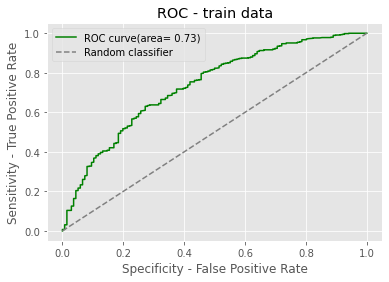

In [124]:
plt.figure()
plt.plot(spec,sens,color ='green',label='ROC curve(area= %0.2f)'%(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random classifier')
plt.xlabel('Specificity - False Positive Rate')
plt.ylabel('Sensitivity - True Positive Rate')
plt.title("ROC - train data")
plt.legend()
plt.show()

In [125]:
roc_auc_test = roc_auc_score(y_test,predict_test)
spec1, sens1, threshold1 = roc_curve(y_test,prob_test)
roc_auc1 = auc(spec1,sens1)
roc_auc1

0.7204650434510295

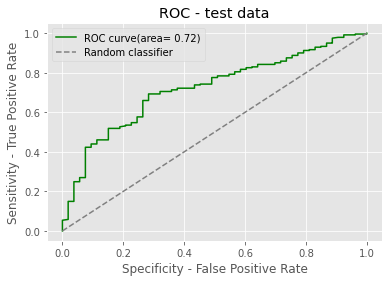

In [126]:
plt.figure()
plt.plot(spec1,sens1,color ='green',label='ROC curve(area= %0.2f)'%(roc_auc1))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random classifier')
plt.xlabel('Specificity - False Positive Rate')
plt.ylabel('Sensitivity - True Positive Rate')
plt.title("ROC - test data")
plt.legend()
plt.show()

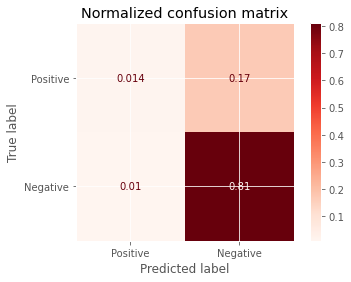

In [127]:
disp = ConfusionMatrixDisplay.from_estimator(
        log_reg2,
        x_test,
        y_test,
        display_labels=['Positive','Negative'],
        cmap=plt.cm.Reds,
        normalize='all'
    )
disp.ax_.set_title("Normalized confusion matrix")
plt.show()